### 가설 - 수면 장애가 있는 사람은 운동량이 낮을 것이다. 

In [34]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('./Sleep_health_and_lifestyle_dataset.csv')
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [20]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


1. 수면 장애 유무 분류
2. 있는 사람 -> 일일 걸음수(Daily steps), 신체 활동 수준(Physical Activity Level)

In [74]:
# 수면 장애가 있는 데이터
df_with_disorder = df[df['Sleep Disorder'].notna()]

# 수면 장애가 없는 데이터
df_without_disorder = df[df['Sleep Disorder'].isna()]

In [76]:
df_with_disorder.info()
df_with_disorder.head()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 3 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                155 non-null    int64  
 1   Gender                   155 non-null    object 
 2   Age                      155 non-null    int64  
 3   Occupation               155 non-null    object 
 4   Sleep Duration           155 non-null    float64
 5   Quality of Sleep         155 non-null    int64  
 6   Physical Activity Level  155 non-null    int64  
 7   Stress Level             155 non-null    int64  
 8   BMI Category             155 non-null    object 
 9   Blood Pressure           155 non-null    object 
 10  Heart Rate               155 non-null    int64  
 11  Daily Steps              155 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 17.0+ KB


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
16,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea


In [79]:
df_without_disorder.head()
df_without_disorder.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 0 to 359
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                219 non-null    int64  
 1   Gender                   219 non-null    object 
 2   Age                      219 non-null    int64  
 3   Occupation               219 non-null    object 
 4   Sleep Duration           219 non-null    float64
 5   Quality of Sleep         219 non-null    int64  
 6   Physical Activity Level  219 non-null    int64  
 7   Stress Level             219 non-null    int64  
 8   BMI Category             219 non-null    object 
 9   Blood Pressure           219 non-null    object 
 10  Heart Rate               219 non-null    int64  
 11  Daily Steps              219 non-null    int64  
 12  Sleep Disorder           0 non-null      object 
dtypes: float64(1), int64(7), object(5)
memory usage: 24.0+ KB


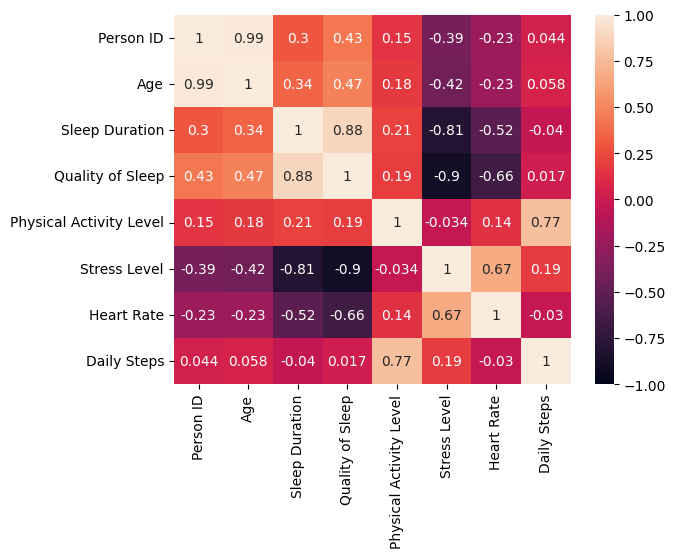

In [71]:
numeric_df = df.select_dtypes(include=["Float64", "int64"])

# 상관 행렬 계산
matrix = numeric_df.corr()

# heatmap
sns.heatmap(matrix, vmin=-1.0, vmax=1.0, annot=True)
# annot는 그래프에 값 나오게 하는 것
plt.show()

In [35]:
df['Physical Activity Level'].max()# 중앙값, 평균 

np.int64(90)

<function matplotlib.pyplot.show(close=None, block=None)>

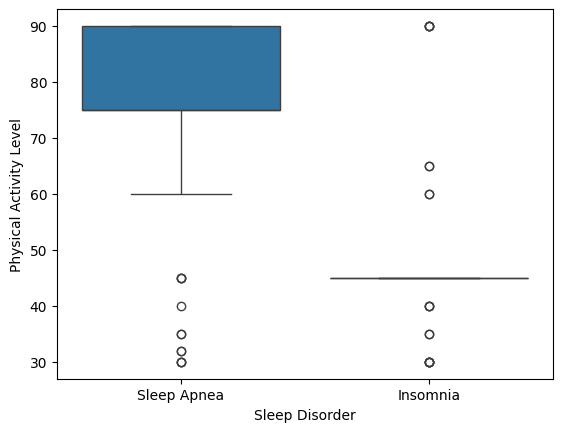

In [38]:
sns.boxplot(
    data=df_cleaned,
    x="Sleep Disorder",
    y="Physical Activity Level",
)
plt.show

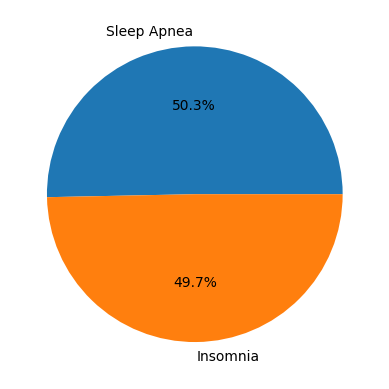

In [39]:
#파이 차트의 값
values = df_cleaned["Sleep Disorder"].value_counts()

labels = values.index

plt.pie(x=values, labels=labels, autopct="%1.1f%%")
plt.show()

In [44]:
insomnia = df_cleaned['Sleep Disorder'] == 'Insomnia'

In [45]:
apnea = df_cleaned['Sleep Disorder'] == 'Sleep Apnea'

<function matplotlib.pyplot.show(close=None, block=None)>

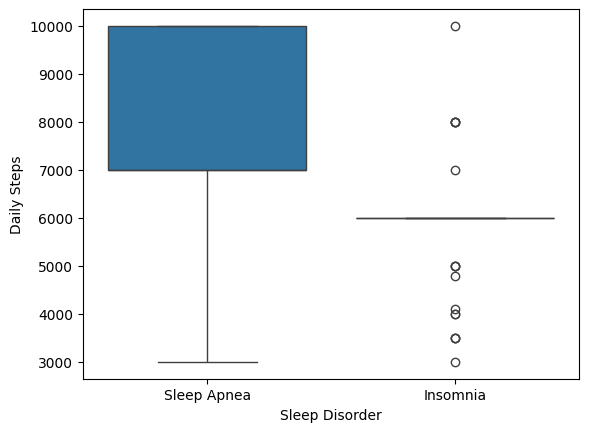

In [57]:
sns.boxplot(
    data=df,
    x="Sleep Disorder", 
    y="Daily Steps",
)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

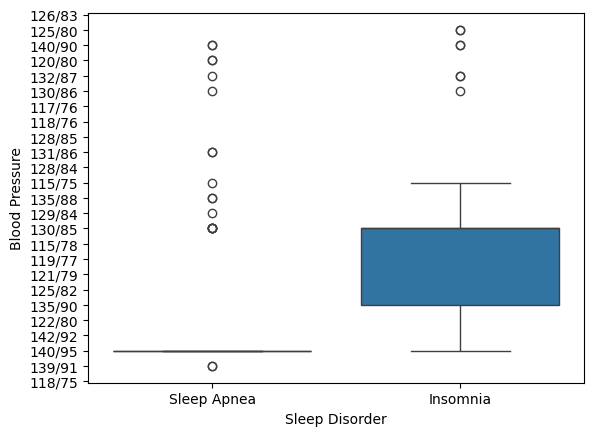

In [56]:
sns.boxplot(
    data=df,
    x="Sleep Disorder", 
    y="Blood Pressure",
)
plt.show

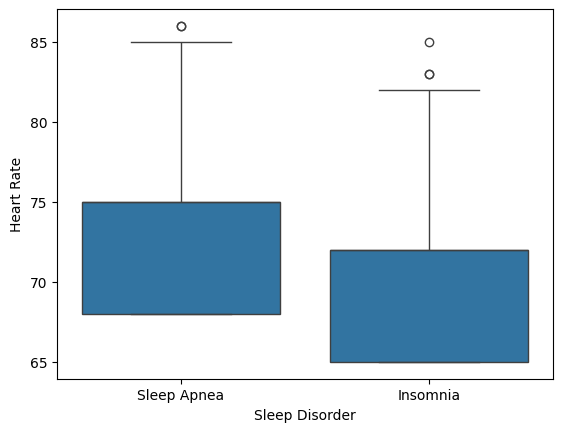

In [61]:
sns.boxplot(
    data=df, 
    x="Sleep Disorder", 
    y="Heart Rate",
)
plt.show()

In [ ]:
Sleep Duration	Quality of Sleep

#### 수면시간과 수면의 질이 낮은 사람은 수면장애를 겪고 있을 것이다. 

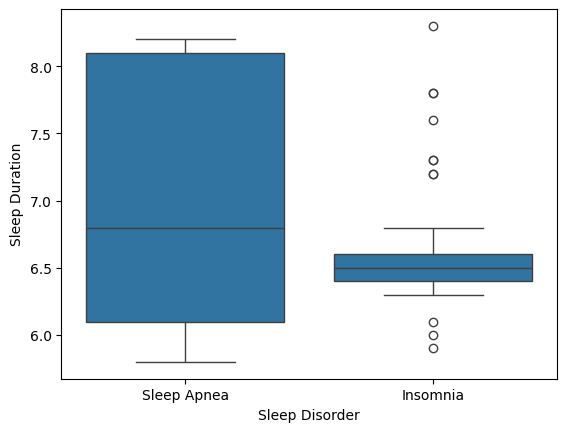

In [63]:
sns.boxplot(
    data=df, 
    x="Sleep Disorder",  # 수면 시간 
    y="Sleep Duration",
)
plt.show()

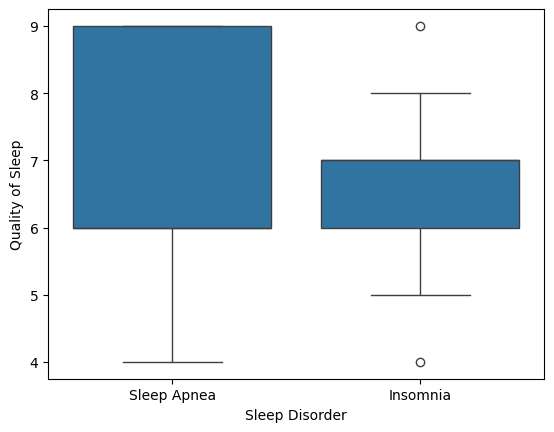

In [64]:
sns.boxplot(
    data=df, 
    x="Sleep Disorder", 
    y="Quality of Sleep",
)
plt.show()

In [68]:
df['Sleep Duration'].mean() # 7.132085561497325

np.float64(7.132085561497325)

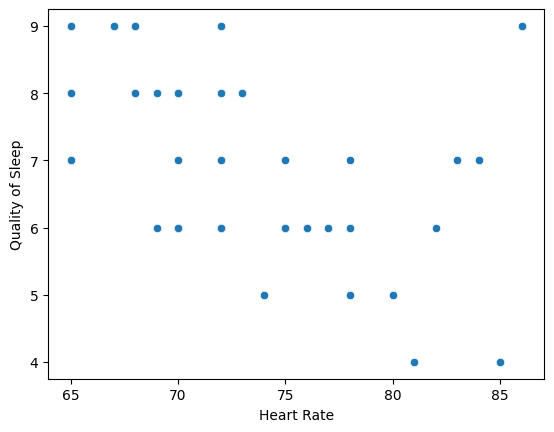

In [69]:
sns.scatterplot(
    data=df, 
    x="Heart Rate", 
    y="Quality of Sleep",
)
plt.show()

In [ ]:
#### 데이터가 합성된 데이터의 값이고 데이터의 수가 부족하기 때문에 주제 변경 